<a href="https://colab.research.google.com/github/bagasap10/COMP6577-MachineLearning/blob/main/MID_CompVis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install --upgrade pip setuptools wheel
!pip install opencv-python==3.4.2.17
!pip install opencv-contrib-python==3.4.2.17

# 1. 

### Gaussian Blur
Gaussian put a significant transition color, and then made a median color to create *soft hazy* effect on an image.

The normal distribution is one dimensional, but a graph is two dimensional. One dimension Gaussian blur format is

$P(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-(x-\mu)^2/2\sigma^2}$

$\mu$ is the average of x. Because center point is the origin point when calculating an average value, so $\mu$ is equals to 0.

$P(x) = \frac{1}{\sigma\sqrt{2\pi}}e^{-x-^2/2\sigma^2}$

From this function we can derive the function into two dimensional Gaussian function.

$P(x,y) = \frac{1}{2\pi\sigma^2}e^{-(x^2+y^2)/2\sigma^2}$

In [23]:
import cv2
import matplotlib.pyplot as plt

In [24]:
img = cv2.imread('/content/when-you-study-5ad8b1.jpg')

In [25]:
gaussian_img = cv2.GaussianBlur(img,(1,1),0)
gaussian_img1 = cv2.GaussianBlur(img,(11,11),0)
gaussian_img1wsigmaX = cv2.GaussianBlur(img,(11,11),10)
gaussian_img2 = cv2.GaussianBlur(img,(31,31),0)
gaussian_img2wsigmaX = cv2.GaussianBlur(img,(31,31),10)
gaussian_img3 = cv2.GaussianBlur(img,(51,51),0)



```
GaussianBlur(src, dst, ksize, sigmaX)
```



GaussianBlur functions need a source image, destination image, size of kernel, and a variable for Gaussian kernel standard deviation. 


In [26]:
res_img = [gaussian_img,gaussian_img1, gaussian_img2, gaussian_img3, gaussian_img2wsigmaX]
res_title = ["Gaussian Blur with 1x1 kernel size"]
res_title1 = ["Gaussian Blur with 11x11 kernel size"]
res_title1sigmaX = ["Gaussian Blur with 11x11 kernel size and 10 standard deviation value"]
res_title2 = ["Gaussian Blur with 31x31 kernel size"]
res_title2sigmaX = ["Gaussian Blur with 31x31 kernel size and 10 standard deviation value"]
res_title3 = ["Gaussian Blur with 51x51 kernel size"]

Text(0.5, 1.0, "['Gaussian Blur with 1x1 kernel size']")

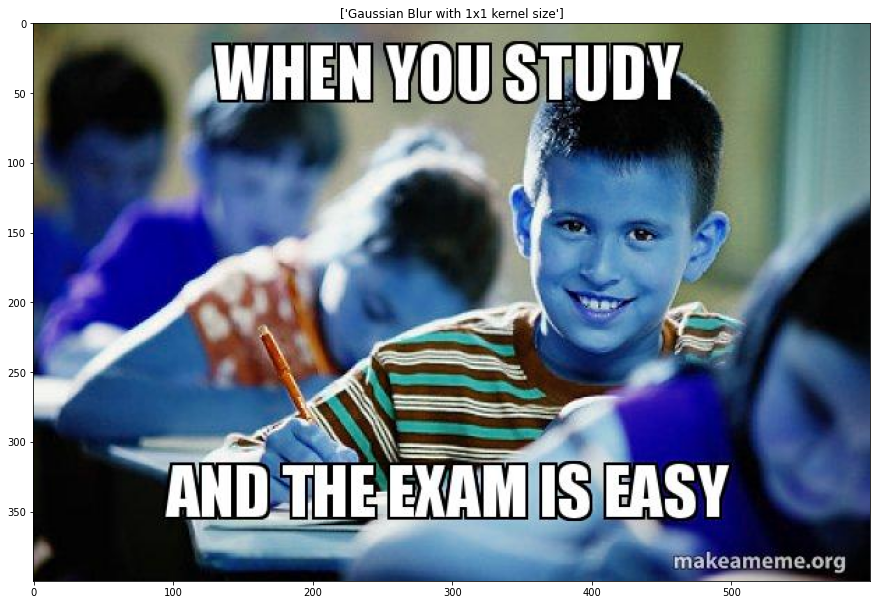

In [27]:
plt.rcParams["figure.figsize"] = (15,15)
plt.imshow(gaussian_img)
plt.title(res_title)

This is gaussian blur with 1x1 kernel. As you can see there is no difference with the original image because we only take 1x1 kernel size to make a median color. Having 1x1 kernel size doesnt help to search for a median color because there is only 1 pixel to transform which is that pixel itself.

Text(0.5, 1.0, "['Gaussian Blur with 11x11 kernel size']")

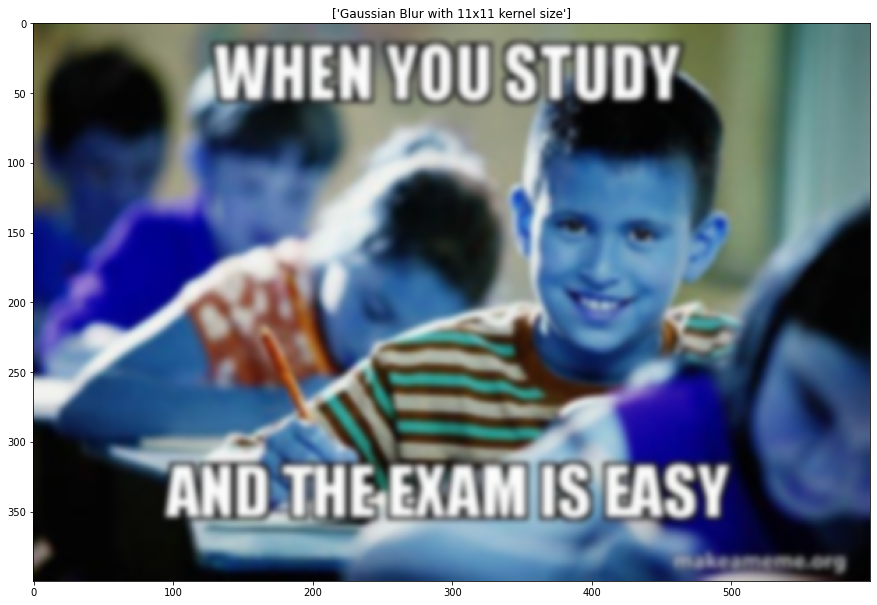

In [28]:
plt.imshow(gaussian_img1)
plt.title(res_title1)

Text(0.5, 1.0, "['Gaussian Blur with 11x11 kernel size and 10 standard deviation value']")

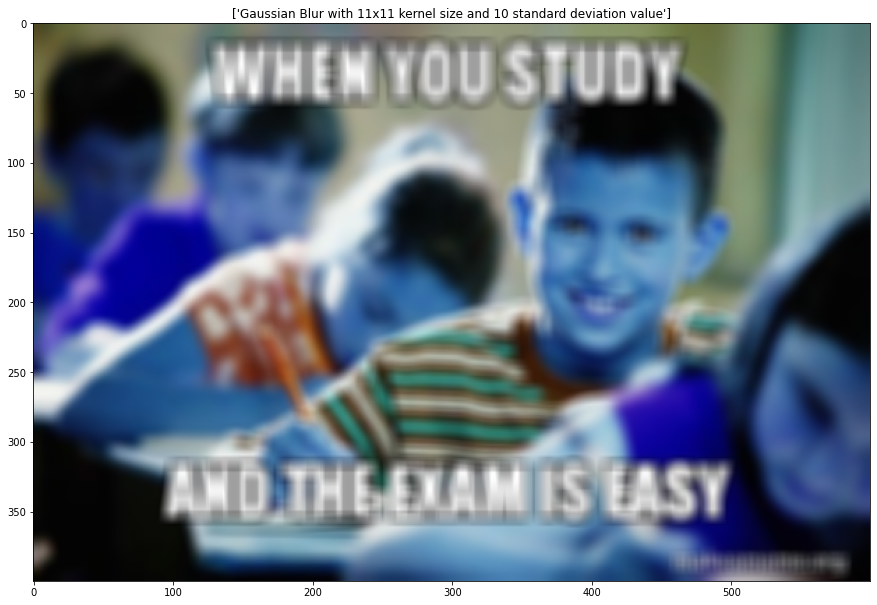

In [29]:
plt.imshow(gaussian_img1wsigmaX)
plt.title(res_title1sigmaX)

This image is a result of 11x11 kernel size, this have a substantial result compared to 1x1 kernel size. 
The sigma parameter is enough to define Gaussian Blur from a continuous point of view. Ideally we would choose a value for sigma, then compute the kernel radius that allows to represent faithfully the corresponding continuous Gaussian kernel. For a given approximation error, the better the sigma is, the larger the radius must be.

Text(0.5, 1.0, "['Gaussian Blur with 31x31 kernel size']")

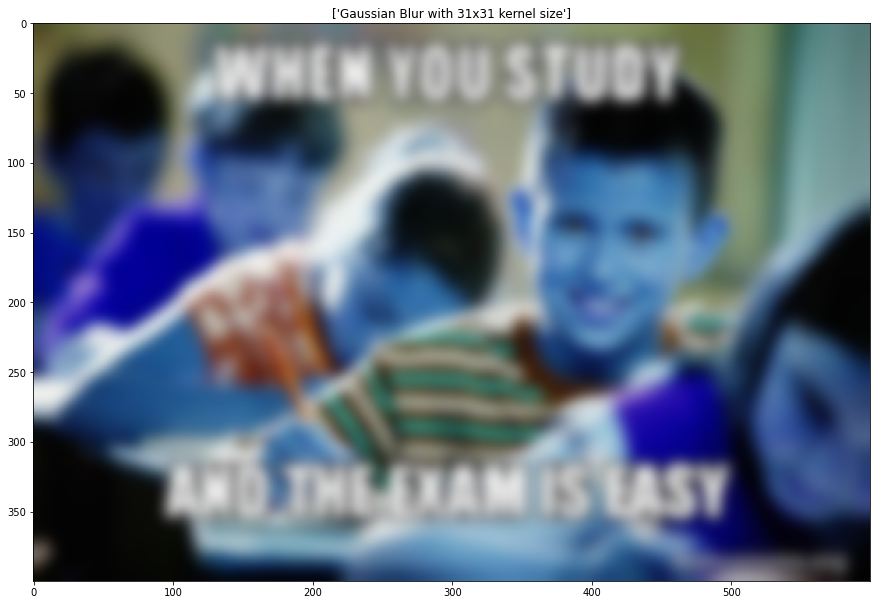

In [30]:
plt.imshow(gaussian_img2)
plt.title(res_title2)

Text(0.5, 1.0, "['Gaussian Blur with 31x31 kernel size and 10 standard deviation value']")

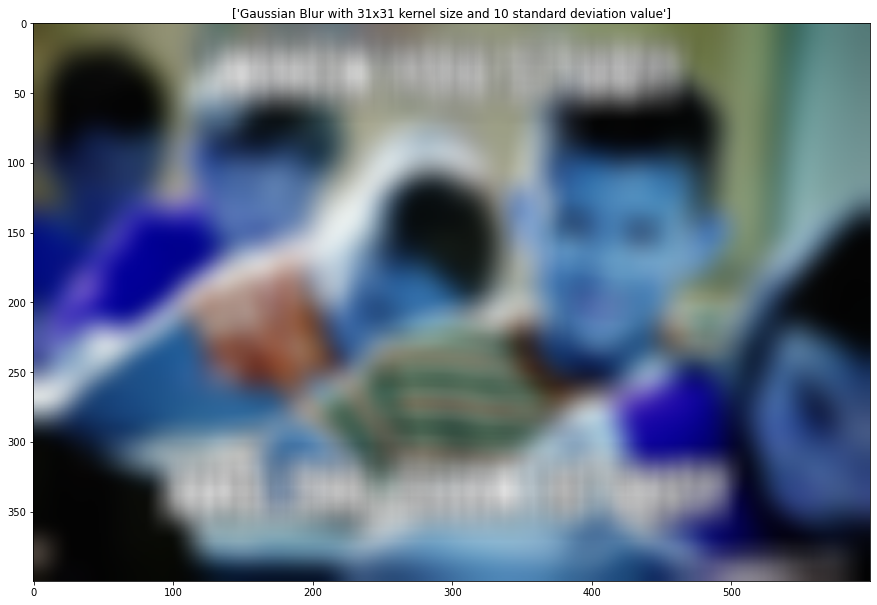

In [31]:
plt.imshow(gaussian_img2wsigmaX)
plt.title(res_title2sigmaX)

Text(0.5, 1.0, "['Gaussian Blur with 51x51 kernel size']")

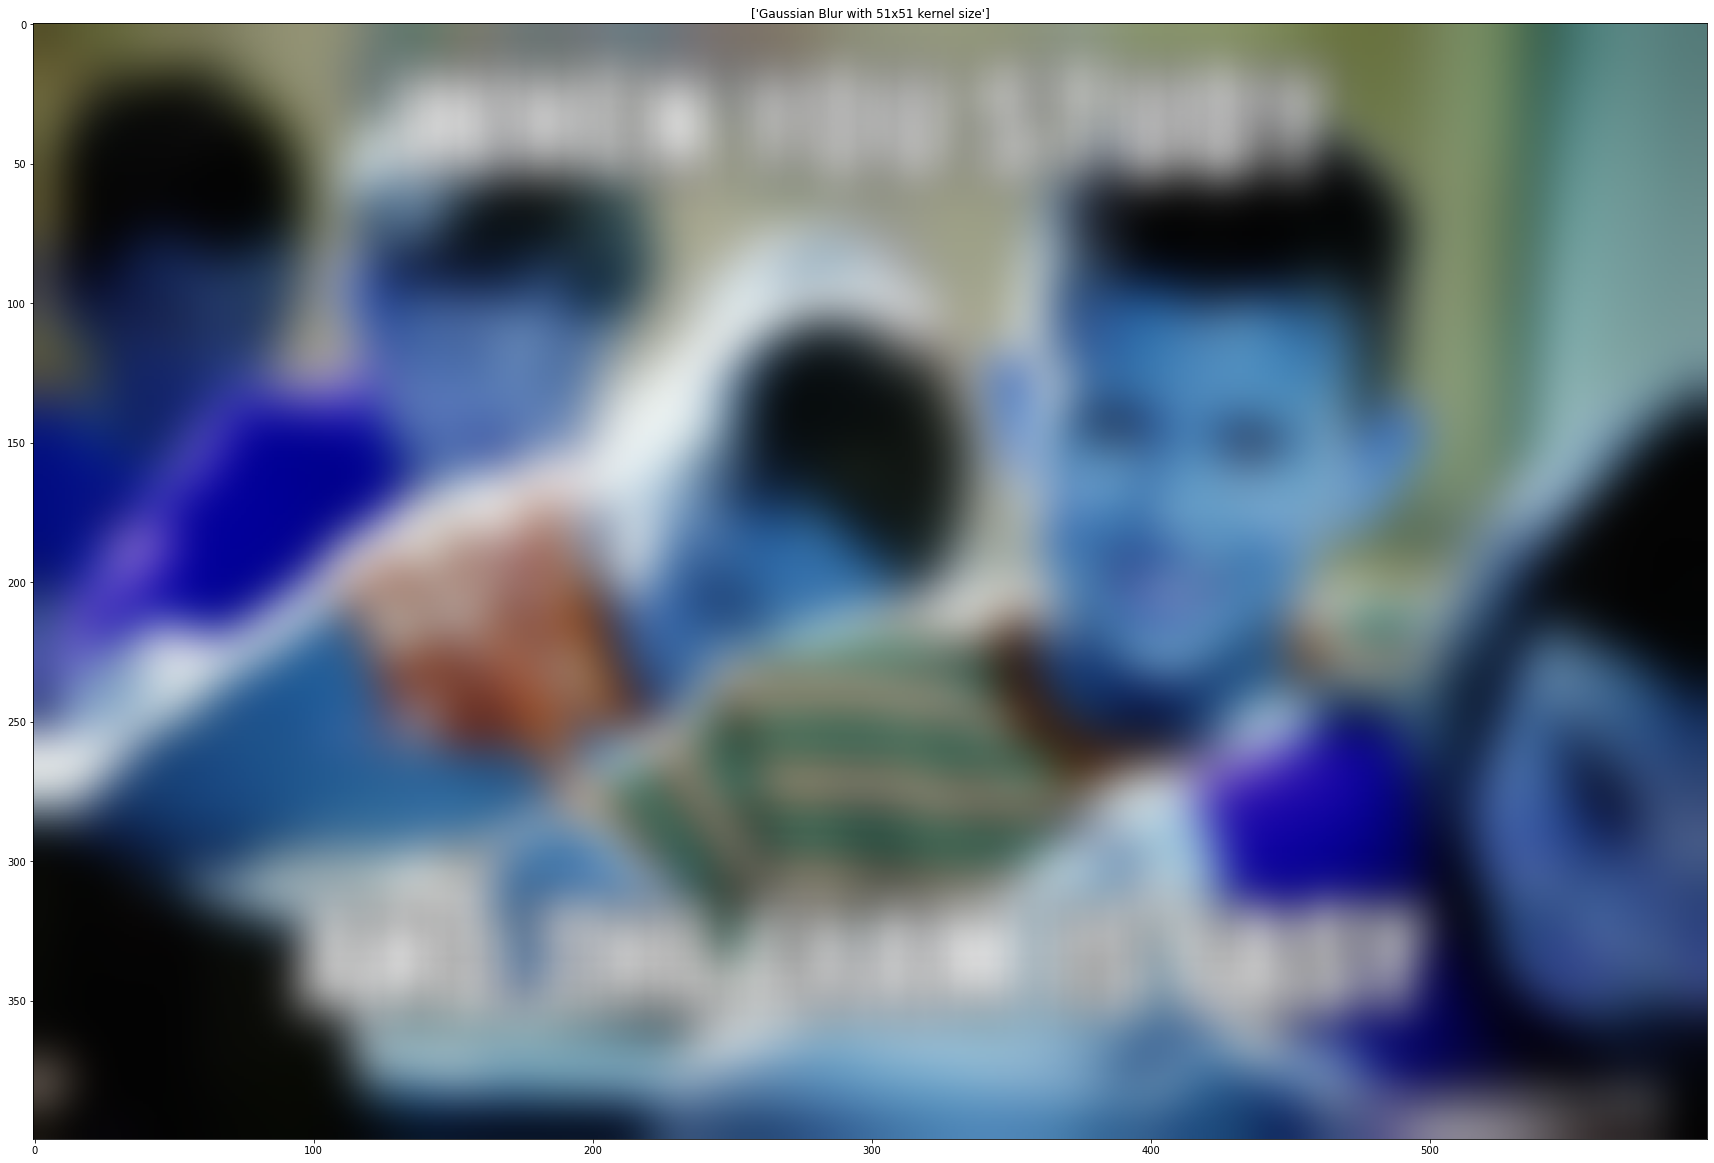

In [20]:
plt.imshow(gaussian_img3)
plt.title(res_title3)

# 2.

### Affine
Affine transformation is when all determined points in original image will still be parallel in the output image. We need three points from input image and corresponding location in the output image to find the transformation matrix.


Affine matrix formula :

$\begin{bmatrix}
   x'\\
   y'\\
   w'
\end{bmatrix} = \begin{bmatrix}
 a & b & c \\
 d & e & f \\
 0 & 0 & 1
 \end{bmatrix} \begin{bmatrix}
   x\\
   y\\
   w
\end{bmatrix}$

In [7]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [8]:
img = cv2.imread('/content/when-you-study-5ad8b1.jpg')
rows, cols, ch = img.shape

In [9]:
pts1 = np.float32([[50, 50], [200, 50], [50, 200]])
pts2 = np.float32([[50, 100], [100, 150], [50, 250]])
  
M = cv2.getAffineTransform(pts1, pts2)
dst = cv2.warpAffine(img, M, (cols, rows))



```
# cv2.getAffineTransform(src,dst)
```
This syntax requires source matrix and destination matrix to process. Source matrix is the coordinates of quadrangle vertices in the destination image. Destination matrix contains the coordinates of the corresponding quadrangle vertices in the destination image. The syntax doesnt warp the image yet, this syntax only accept and transform matrices to be accepted for the next syntax.




```
# warpAffine(src, M, dsize, dst, flags, borderMode, borderValue)
```





This is where those points that have been transformed on `getAffineTransform(pts1,pts2)` are processed. Source is the input image. M is the transformation matrix (which is the `getAffineTransform`). Dst is the destination image. Dsize is the size of the output image. Flags adds a combination of interpolation methods, this could be inverse transformation. borderMode is the pixel extrapolation method. borderValue is the value used in case of a constant border.

We can change the value of the matrix to determine the result whether we want it to be skewed horizontally or vertically etc.

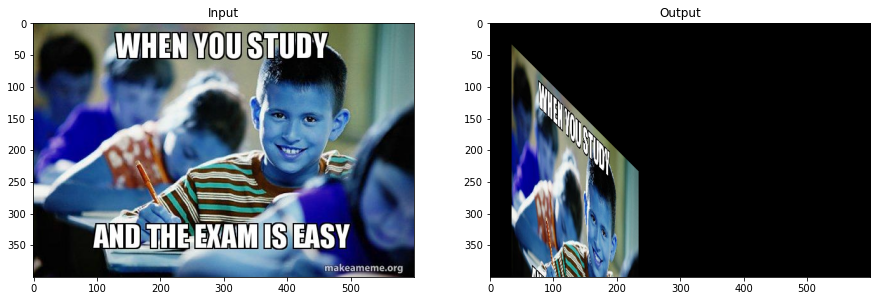

In [32]:
plt.rcParams["figure.figsize"] = (15,15)
plt.subplot(121)
plt.imshow(img)
plt.title('Input')
  
plt.subplot(122)
plt.imshow(dst)
plt.title('Output')
plt.show()

Affine transformation are most commonly used where we have a detected image which has undergone some type of distortion. The geometrically correct version of the input image can be obtained from the affine transformation by resampling the input image such that the information at each point mapped to the correct position in a corresponding output image.

# 3.

In [ ]:
import cv2
from matplotlib import pyplot as plt

In [ ]:
img = cv2.imread('/content/when-you-study-5ad8b1.jpg')
target = cv2.imread('/content/smiling-student1.jpg')

imgBW = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
target = cv2.cvtColor(target, cv2.COLOR_BGR2GRAY)

In [ ]:
surf = cv2.xfeatures2d.SURF_create()
img_kpoints, img_descr = surf.detectAndCompute(img, None)
target_kpoints, target_descr = surf.detectAndCompute(target, None)

In [ ]:
INDEX_PARAMS = dict(algorithm = 0)
SEARCH_PARAMS = dict(checks = 50)

FLANN = cv2.FlannBasedMatcher(INDEX_PARAMS, SEARCH_PARAMS)

matches = FLANN.knnMatch(img_descr, target_descr, k=2)
matches_arr = []

In [ ]:
for i in range(len(matches)):
  matches_arr.append([0,0])

for i,(x,y) in enumerate(matches):
  if x.distance < 0.33 * y.distance:
    matches_arr[i] = [1,0]

result_img = cv2.drawMatchesKnn(
    img, img_kpoints,
    target, target_kpoints,
    matches, None, matchColor=[255,0,0],
    matchesMask = matches_arr
)

<function matplotlib.pyplot.show>

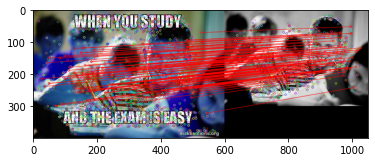

In [ ]:
plt.imshow(result_img)
plt.show